<a href="https://colab.research.google.com/github/dhimasyp/PRAKTIKUM_ML_120-255/blob/Anisa/(versi_3)_Kegiatan_Modul_3_Keg2_ML_Anisa120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#import library 
import pandas as pd
import numpy as np
import os, cv2, shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten,BatchNormalization, Dropout, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from google.colab import files
from keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Dataset_BrainTumor"

In [10]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/Dataset_BrainTumor

/content/drive/My Drive/Dataset_BrainTumor


In [11]:
!ls

kaggle.json


In [40]:
!kaggle datasets download -d denizkavi1/brain-tumor

 99% 691M/700M [00:06<00:00, 107MB/s]
100% 700M/700M [00:06<00:00, 109MB/s]


In [41]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

brain-tumor.zip  kaggle.json


**Preprocessing**

In [42]:
#Ekstrak dataset
import os
import zipfile

local_zip = "/content/drive/MyDrive/Dataset_BrainTumor/brain-tumor.zip"
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Dataset_BrainTumor/brain-tumor.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/Dataset_BrainTumor")

In [44]:
!ls

brain-tumor.zip  Glioma  kaggle.json  Meningioma  Pituitary


In [47]:
os.makedirs('/content/drive/My Drive/Dataset_BrainTumor/Dataset')

In [48]:
shutil.move('Meningioma', 'Dataset')
shutil.move('Pituitary', 'Dataset')
shutil.move('Glioma', 'Dataset')

'Dataset/Glioma'

In [49]:
!ls

brain-tumor.zip  Dataset  kaggle.json


In [50]:
!pip install split-folders

In [51]:
base_dir = '/content/drive/My Drive/Dataset_BrainTumor'
data_dir = '/content/drive/My Drive/Dataset_BrainTumor/Dataset'

In [52]:
import splitfolders
splitfolders.ratio(data_dir, output=base_dir, seed=1337, ratio=(.7,.15,.15),group_prefix=None)

Copying files: 3064 files [01:04, 47.72 files/s]


In [53]:
!ls

brain-tumor.zip  Dataset  kaggle.json  test  train  val


**Preprocessing**

In [54]:
# TULIS KODE ANDA DISINI
datagen = ImageDataGenerator(rescale=1./255)

In [56]:
input_shape = (150, 150)

train = '/content/drive/My Drive/Dataset_BrainTumor/train'
train_generator = datagen.flow_from_directory(train,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= True)

validation = '/content/drive/My Drive/Dataset_BrainTumor/val'
validation_generator = datagen.flow_from_directory(validation,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= True)

test = '/content/drive/My Drive/Dataset_BrainTumor/test'
test_generator = datagen.flow_from_directory(test,
                                              target_size=input_shape,
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

Found 2144 images belonging to 3 classes.
Found 458 images belonging to 3 classes.
Found 462 images belonging to 3 classes.


In [59]:
# Feature Extraction Layer 
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 38, 38, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 19, 19, 64)      

In [60]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [61]:
H = model.fit_generator(train_generator, epochs = 100, validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
67/67 [==============================] - 68s 562ms/step - loss: 0.6393 - acc: 0.6667 - val_loss: 0.6366 - val_acc: 0.6667
Epoch 2/100
67/67 [==============================] - 37s 551ms/step - loss: 0.6366 - acc: 0.6667 - val_loss: 0.6365 - val_acc: 0.6667
Epoch 3/100
67/67 [==============================] - 37s 550ms/step - loss: 0.6365 - acc: 0.6667 - val_loss: 0.6365 - val_acc: 0.6667
Epoch 4/100
67/67 [==============================] - 37s 556ms/step - loss: 0.6365 - acc: 0.6667 - val_loss: 0.6365 - val_acc: 0.6667
Epoch 5/100
67/67 [==============================] - 37s 557ms/step - loss: 0.6365 - acc: 0.6667 - val_loss: 0.6365 - val_acc: 0.6667
Epoch 6/100
67/67 [==============================] - 37s 552ms/step - loss: 0.6365 - acc: 0.6667 - val_loss: 0.6365 - val_acc: 0.6667
Epoch 7/100
67/67 [==============================] - 37s 559ms/step - loss: 0.6365 - acc: 0.6667 - val_loss: 0.6365 - val_acc: 0.6667
Epoch 8/100
67/67 [==============================] - 37s 553ms

In [62]:
# TULIS KODE ANDA DISINI
# Extraction Layer
model2 = Sequential()

model2.add(InputLayer(input_shape=[150, 150, 3]))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Dropout(0.25))
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(3, activation='softmax'))

# Print model summary
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       256       
 hNormalization)                                                 
                                                      

In [63]:
# Compile model
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [64]:
H = model2.fit_generator(train_generator, epochs = 100, validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
67/67 [==============================] - 41s 584ms/step - loss: 1.1436 - acc: 0.6726 - val_loss: 12.0436 - val_acc: 0.4651
Epoch 2/100
67/67 [==============================] - 38s 575ms/step - loss: 0.3821 - acc: 0.7285 - val_loss: 9.7774 - val_acc: 0.4651
Epoch 3/100
67/67 [==============================] - 38s 570ms/step - loss: 0.3264 - acc: 0.7495 - val_loss: 5.9656 - val_acc: 0.4651
Epoch 4/100
67/67 [==============================] - 38s 573ms/step - loss: 0.2815 - acc: 0.8060 - val_loss: 3.1277 - val_acc: 0.5197
Epoch 5/100
67/67 [==============================] - 38s 572ms/step - loss: 0.2428 - acc: 0.8223 - val_loss: 1.1361 - val_acc: 0.5240
Epoch 6/100
67/67 [==============================] - 38s 571ms/step - loss: 0.2085 - acc: 0.8643 - val_loss: 0.2963 - val_acc: 0.8362
Epoch 7/100
67/67 [==============================] - 38s 570ms/step - loss: 0.1935 - acc: 0.8783 - val_loss: 0.2655 - val_acc: 0.8275
Epoch 8/100
67/67 [==============================] - 38s 571m

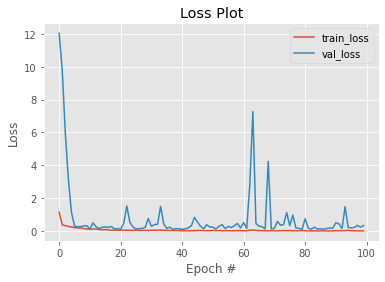

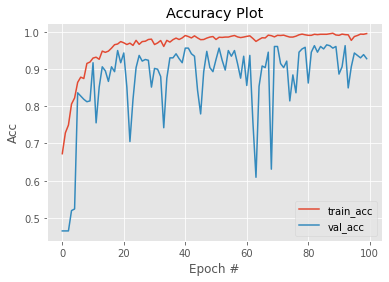

In [65]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [66]:
ypred = model.predict(test_generator)
predictions = np.argmax(ypred, axis = 1)
print(classification_report(test_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       215
           1       0.00      0.00      0.00       107
           2       0.00      0.00      0.00       140

    accuracy                           0.47       462
   macro avg       0.16      0.33      0.21       462
weighted avg       0.22      0.47      0.30       462



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
model.save('model.h5')